<a href="https://colab.research.google.com/github/Mateoskix/AI/blob/main/Pr%C3%A1ctica_Visi%C3%B3n_artificial_Manzana_Pera_Histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica Visión artificial Manzana-Pera**
Julián Ortiz
Mateo Gonzalez
Tobias Arrieta

# CLASIFICACIÓN DE IMÁGENES
1. Preparación de las imágenes
2. División de los datos 70-30
3. Aprendizaje de la Red
4. Evaluación del Modelo
5. Guardar el Modelo

# **1. Preparación de las imágenes**
Se cargan las 31 imagenes de manzanas y las 31 imagenes de pera

In [ ]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tratamiento de imágenes
from PIL import Image

# Lectura del directorio de imágenes
import os, sys

In [ ]:
# Lectura de la carpeta con las imágenes de manzana
path = "manzana"
files = os.listdir( path )

mat_hist=[] # Matriz con los histogramas
nombres=[] #Nombres de los archivos

# Se leen las imágenes y se calcula el histograma
for f in files:
  if f.endswith('.jpg'):
    #Nombre de la imagen
    print(f)
    nombres.append(f)
    #Leemos la imagen
    img = Image.open(path+'/'+ f)
    img=img.resize((300,300))
    # Calculamos histograma de color
    hist = img.histogram()
    #Adicionamos el histograma a la matriz
    mat_hist.append(hist)

# Data frame con los histogramas
manzana=pd.DataFrame(mat_hist)
manzana['clase']="manzana"

5.jpg
30.jpg
26.jpg
21.jpg
16.jpg
24.jpg
29.jpg
11.jpg
3.jpg
31.jpg
19.jpg
28.jpg
17.jpg
15.jpg
25.jpg
12.jpg
20.jpg
23.jpg
1.jpg
27.jpg
10.jpg
13.jpg
18.jpg
8.jpg
9.jpg
2.jpg
7.jpg
22.jpg
6.jpg
14.jpg
4.jpg


In [ ]:
manzana.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,clase
0,0,0,0,0,0,0,0,0,0,0,...,359,515,657,575,701,758,14109,1130,4385,manzana
1,0,0,0,0,0,0,0,0,0,0,...,384,479,693,693,1049,1754,26812,1718,2552,manzana
2,0,0,0,0,0,0,0,0,0,0,...,298,687,784,1095,1815,2230,44738,3315,3412,manzana
3,0,0,0,0,0,0,0,0,0,0,...,248,353,561,551,786,820,49847,974,2481,manzana
4,93,50,42,44,61,115,191,596,626,454,...,0,0,0,0,0,0,0,0,0,manzana


In [ ]:
# Lectura de la carpeta con las imágenes de manzana
path = "pera"
files = os.listdir( path )

mat_hist=[] # Matriz con los histogramas

# Se leen las imágenes y se calcula el histograma
for f in files:
  if f.endswith('.jpg'):
    #Nombre de la imagen
    print(f)
    nombres.append(f)
    #Leemos la imagen
    img = Image.open(path+'/'+ f)
    img=img.resize((300,300))
    # Calculamos histograma de color
    hist = img.histogram()
    #Adicionamos el histograma a la matriz
    mat_hist.append(hist)

# Data frame con los histogramas
pera=pd.DataFrame(mat_hist)
pera['clase']="pera"

5.jpg
30.jpg
26.jpg
21.jpg
16.jpg
24.jpg
29.jpg
11.jpg
3.jpg
31.jpg
19.jpg
28.jpg
17.jpg
15.jpg
25.jpg
12.jpg
20.jpg
23.jpg
1.jpg
27.jpg
10.jpg
13.jpg
18.jpg
8.jpg
9.jpg
2.jpg
7.jpg
22.jpg
6.jpg
14.jpg
4.jpg


In [ ]:
pera.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,clase
0,1,0,0,0,1,0,3,12,15,16,...,0,0,0,0,0,0,0,0,0,pera
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pera
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pera
3,0,0,0,0,0,0,0,0,0,0,...,170,192,344,485,472,605,701,962,63582,pera
4,6171,22306,20948,8557,3034,865,576,335,197,148,...,0,0,0,0,0,0,0,0,0,pera


In [ ]:
#Unimos los dos conjuntos de datos
data = pd.concat([manzana, pera], axis=0)
data

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,clase
0,0,0,0,0,0,0,0,0,0,0,...,359,515,657,575,701,758,14109,1130,4385,manzana
1,0,0,0,0,0,0,0,0,0,0,...,384,479,693,693,1049,1754,26812,1718,2552,manzana
2,0,0,0,0,0,0,0,0,0,0,...,298,687,784,1095,1815,2230,44738,3315,3412,manzana
3,0,0,0,0,0,0,0,0,0,0,...,248,353,561,551,786,820,49847,974,2481,manzana
4,93,50,42,44,61,115,191,596,626,454,...,0,0,0,0,0,0,0,0,0,manzana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,0,0,0,...,760,907,963,2011,1298,432,707,517,49359,pera
27,0,0,0,0,0,0,0,0,0,0,...,212,246,341,401,476,525,650,1167,68610,pera
28,0,0,0,0,0,0,0,0,0,0,...,236,301,325,479,701,527,4470,1150,59188,pera
29,0,0,0,0,0,0,0,0,0,0,...,342,469,553,761,895,623,1149,895,44860,pera


<Axes: >

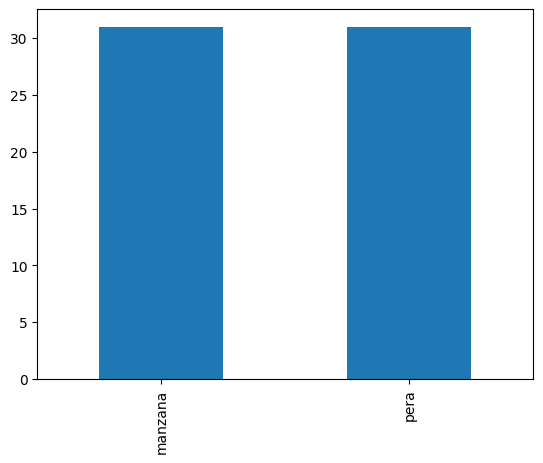

In [ ]:
#Variable objetivo
data['clase'].value_counts().plot(kind='bar')

#31 imagenes de cada fruta

In [ ]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["clase"]=labelencoder.fit_transform(data["clase"])

data.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,clase
0,0,0,0,0,0,0,0,0,0,0,...,359,515,657,575,701,758,14109,1130,4385,0
1,0,0,0,0,0,0,0,0,0,0,...,384,479,693,693,1049,1754,26812,1718,2552,0
2,0,0,0,0,0,0,0,0,0,0,...,298,687,784,1095,1815,2230,44738,3315,3412,0
3,0,0,0,0,0,0,0,0,0,0,...,248,353,561,551,786,820,49847,974,2481,0
4,93,50,42,44,61,115,191,596,626,454,...,0,0,0,0,0,0,0,0,0,0


## **2. División de los datos 70-30**

<Axes: >

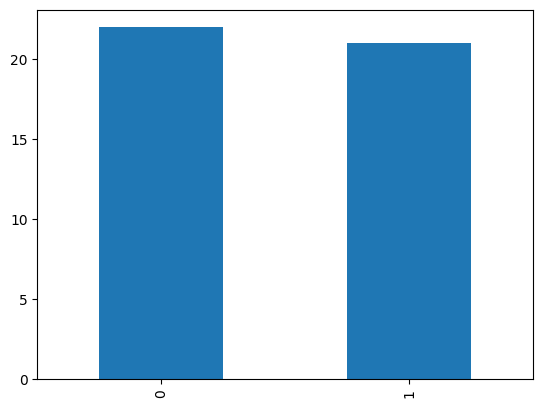

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("clase", axis = 1) # Variables predictoras
Y = data['clase'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
Y_train.value_counts().plot(kind='bar')

## **3. Aprendizaje de la Red**

MODELO PREDICTIVO CON HISTOGRAMA DE COLOR

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#Asignar semilla para generar números aleatorios
import tensorflow as tf
tf.random.set_seed(3)

#Arquitectura de la red neuronal profunda
model_deep = Sequential()
model_deep.add(Dense(400, input_dim=768, activation='sigmoid')) #768 entradas
model_deep.add(Dense(900, activation='relu')) #capa oculta
model_deep.add(Dense(900, activation='sigmoid')) #capa oculta
model_deep.add(Dense(900, activation='sigmoid')) #capa oculta
model_deep.add(Dense(2, activation='softmax')) #capa de salida (valores de la variable objetivo)

#Aprendizaje
optimizer = keras.optimizers.Adam(learning_rate=0.03)
model_deep.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history=model_deep.fit(X_train, Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 51ms/step - loss: 2.3625 - accuracy: 0.5349
Epoch 2/500
2/2 [==============================] - 0s 43ms/step - loss: 0.5512 - accuracy: 0.6047
Epoch 3/500
2/2 [==============================] - 0s 52ms/step - loss: 1.4705 - accuracy: 0.5581
Epoch 4/500
2/2 [==============================] - 0s 45ms/step - loss: 0.6513 - accuracy: 0.7442
Epoch 5/500
2/2 [==============================] - 0s 46ms/step - loss: 1.5925 - accuracy: 0.5814
Epoch 6/500
2/2 [==============================] - 0s 45ms/step - loss: 0.3963 - accuracy: 0.8837
Epoch 7/500
2/2 [==============================] - 0s 50ms/step - loss: 0.5027 - accuracy: 0.7442
Epoch 8/500
2/2 [==============================] - 0s 49ms/step - loss: 0.3774 - accuracy: 0.8372
Epoch 9/500
2/2 [==============================] - 0s 56ms/step - loss: 0.4978 - accuracy: 0.7907
Epoch 10/500
2/2 [==============================] - 0s 41ms/step - loss: 0.3596 - accuracy: 0.8372
Epoch 11/500
2/2 [=

## **4. Evaluación del Modelo**

Evaluación modelo predictivo con histograma de color

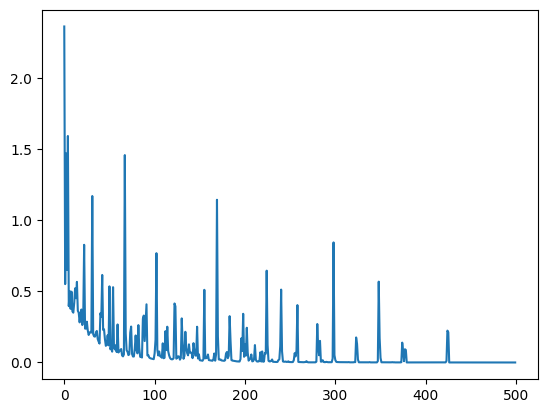

In [ ]:
#Gráfica del error por cada iteración
plt.plot(history.history['loss'])

In [ ]:
#Evaluación modelo deep

loss, acc = model_deep.evaluate(X_test, Y_test, verbose=0) #30%
print(loss)
print(acc)

1.5758675336837769
0.8421052694320679


## **5. Guardar el Modelo**

In [ ]:
#Guardamos el modelo
model_deep.save('model_histogram.h5')

In [ ]:
#Guardamos el labelencoder y los nombres de columnas si son necesarios
import pickle
filename = 'labelencoder.pkl'
pickle.dump(labelencoder, open(filename, 'wb'))